# Distributions

## Binomial distribution

### PMF

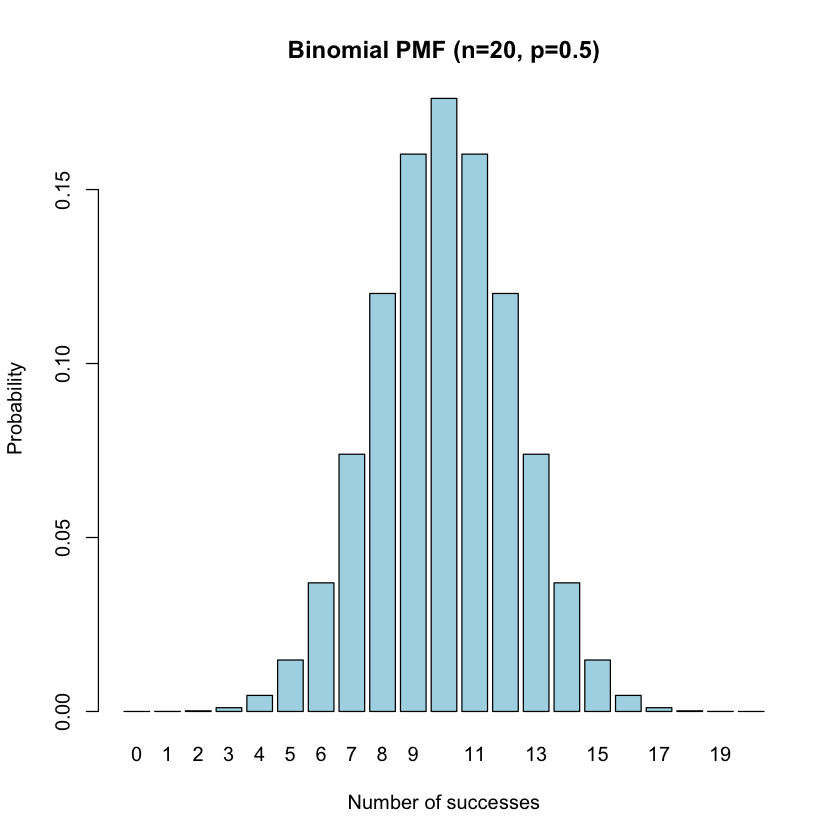

In [1]:
n  <- 20     # number of trials
p  <- 0.5    # success probability
x  <- 0:n    # possible number of successes
pmf <- dbinom(x, size=n, prob=p)

# Barplot of the PMF
barplot(pmf,
    names.arg = x,
    xlab      = "Number of successes",
    ylab      = "Probability",
    main      = paste0("Binomial PMF (n=", n, ", p=", p, ")"),
    col       = "lightblue",
)


### CDF

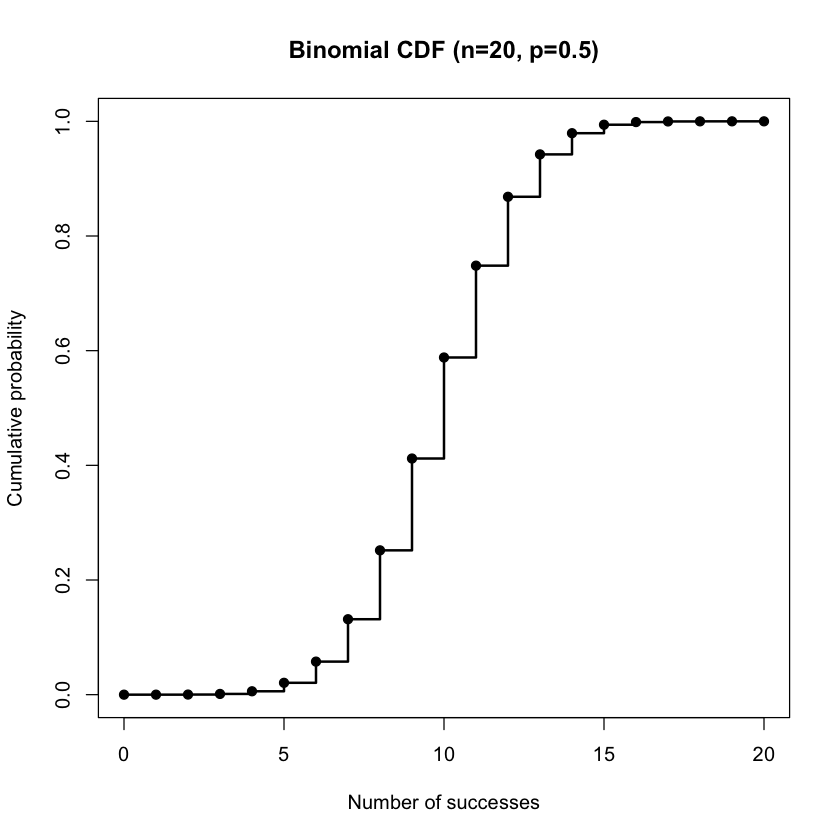

In [2]:
# Compute the CDF at each x
cdf <- pbinom(x, size=n, prob=p)

# Plot the CDF as a step function
plot(x, cdf,
    type  = "s",            # "s" = steps
    xlab  = "Number of successes",
    ylab  = "Cumulative probability",
    main  = paste0("Binomial CDF (n=", n, ", p=", p, ")"),
    lwd   = 2
)
points(x, cdf, pch = 19)    # add points at each step

### Simulation

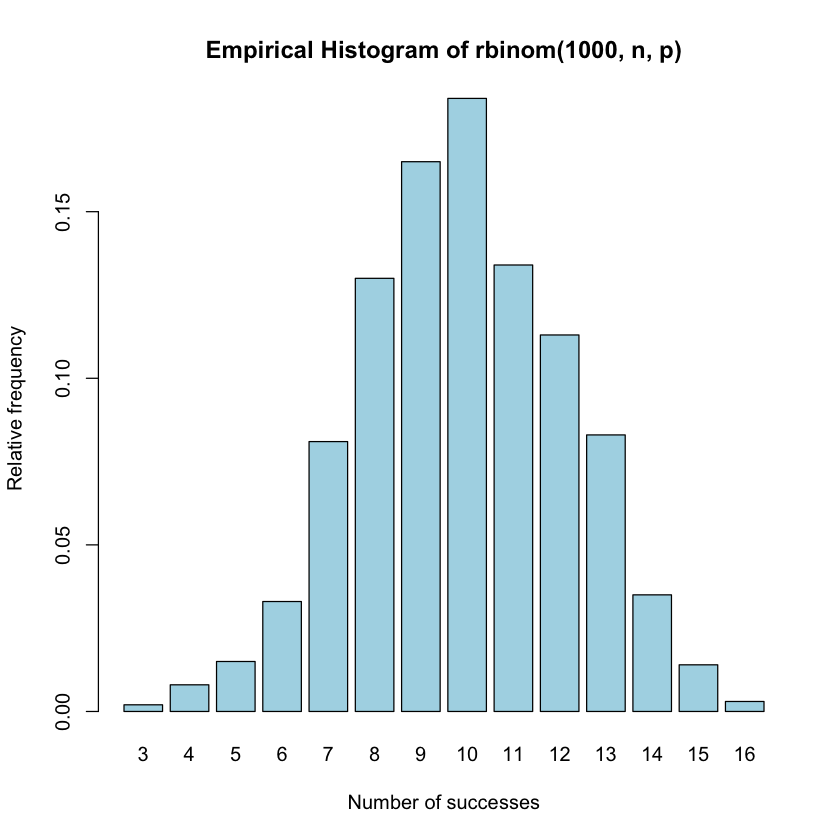

In [3]:
# Simulate 1,000 draws of a Binomial(n = 10, p = 0.3)
set.seed(42)           # for reproducibility
sims <- rbinom(1000, size = n, prob = p)

# Tabulate relative frequencies
freqs <- table(sims) / length(sims)

# Barplot
barplot(freqs,
    names.arg = names(freqs),
    xlab      = "Number of successes",
    ylab      = "Relative frequency",
    main      = "Empirical Histogram of rbinom(1000, n, p)",
    col       = "lightblue",
)


## Hypergeometric distribution

### PMF

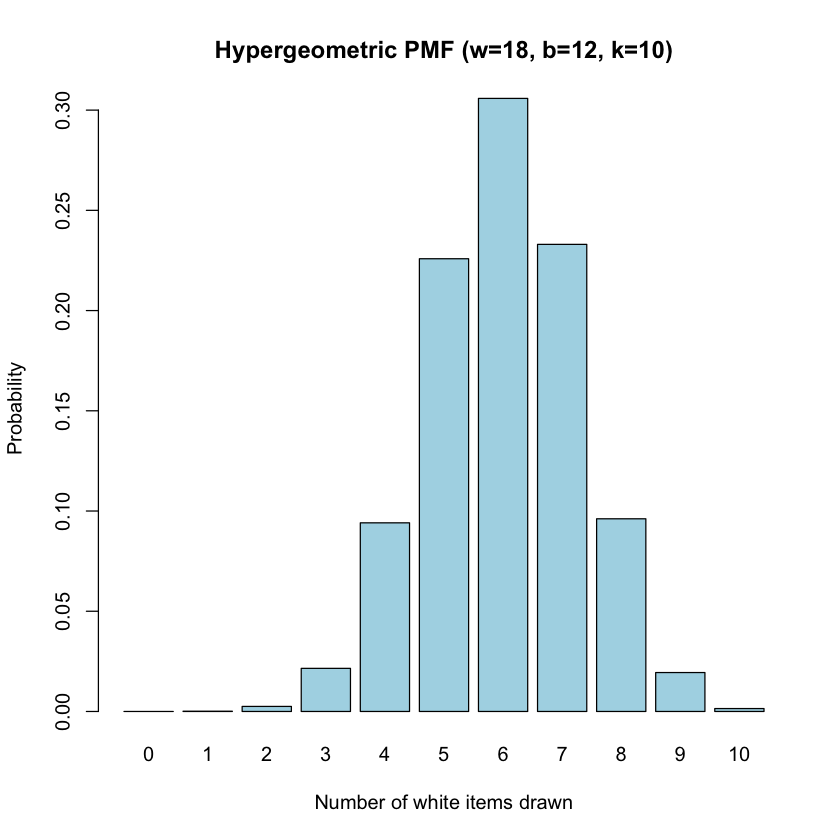

In [8]:
# Parameters
w <- 18 # white (success) items
b <- 12 # black (failure) items
k <- 10   # number of draws

# Possible number of white items drawn
x <- max(0, k-b):min(k, w)

# Compute PMF
pmf_hyp <- dhyper(x, w, b, k)

# Barplot of the PMF
barplot(pmf_hyp,
    names.arg = x,
    xlab      = "Number of white items drawn",
    ylab      = "Probability",
    main      = paste0("Hypergeometric PMF (w=", w, ", b=", b, ", k=", k, ")"),
    col       = "lightblue",
)


### CDF

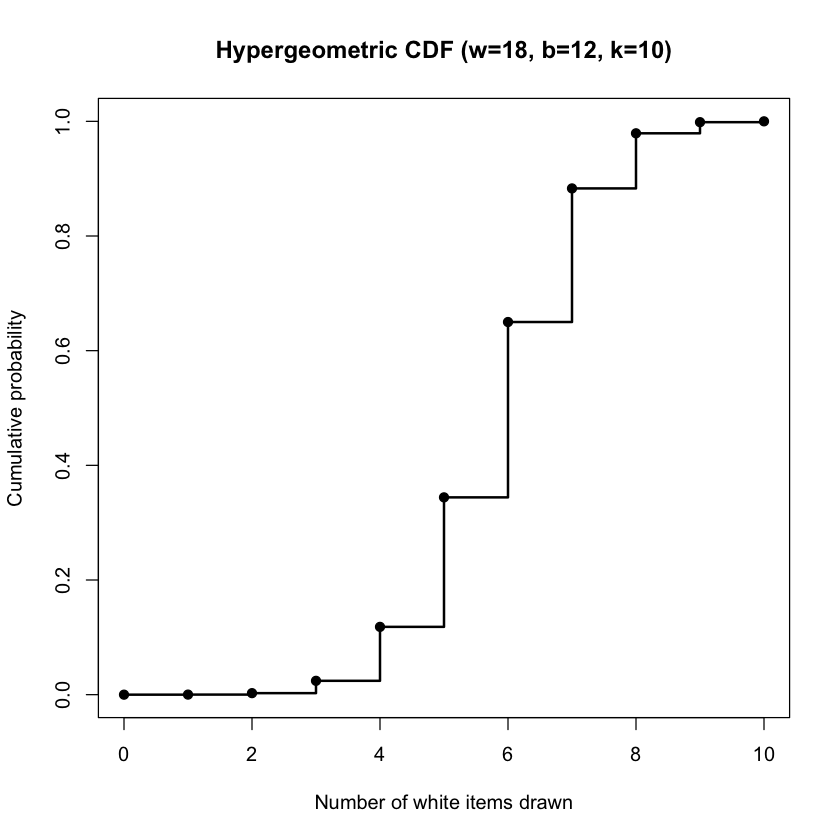

In [9]:
# CDF at each x
cdf_hyp <- phyper(x, w, b, k)

# Step‐plot of the CDF
plot(
    x, 
    cdf_hyp,
    type  = "s",
    xlab  = "Number of white items drawn",
    ylab  = "Cumulative probability",
    main  = paste0("Hypergeometric CDF (w=", w, ", b=", b, ", k=", k, ")"),
    lwd   = 2,
)
points(x, cdf_hyp, pch = 19)


### Simulation

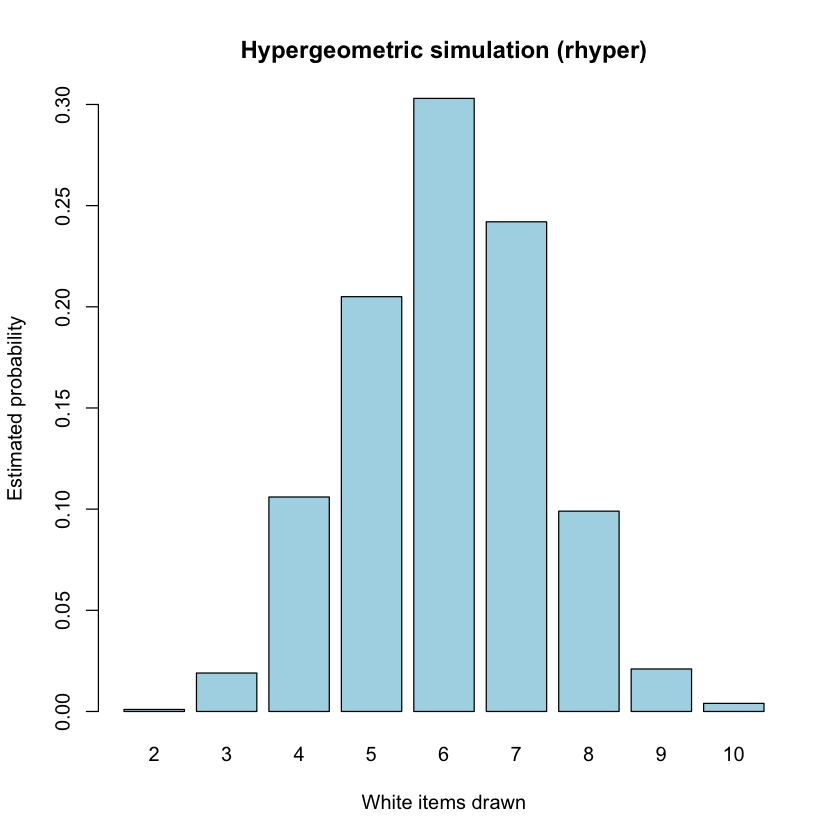

In [10]:
# Simulate 1,000 draws from Hypergeometric(m = w, n = b, k = k)
set.seed(42)
sims <- rhyper(1000, m = w, n = b, k = k)

# Barplot of relative frequencies
barplot(table(sims) / length(sims),
    xlab = "White items drawn",
    ylab = "Estimated probability",
    main = "Hypergeometric simulation (rhyper)",
    col = "lightblue",
)


## Sampling

In [13]:
x <- c(0, 1, 5, 10)
x

[1]  0  1  5 10

In [14]:
p <- c(0.25, 0.5, 0.1, 0.15)
p

[1] 0.25 0.50 0.10 0.15

In [15]:
sample(x, 100, prob=p, replace=TRUE)

[1] 10  1 10  0  1  1  0  0  1 10  1  0  1  1  1 10  1  1 10  1 10  1  1  1  1
 [26]  1  1  1  5  5  5  1  1  1  1  0  5  0  1  1  5  1  1  0  0  1  0 10  5  1
 [51] 10  1  1  0  1 10  0  0  1  1  1 10  1  1  1  0 10  1  1  0  0  1  1  5  1
 [76]  0  5  1  1  1  1  5  1  0  0  1  5  0  0  1  5  1 10  0  1  0  0  1  5  0

## Geometric distribution

### PMF

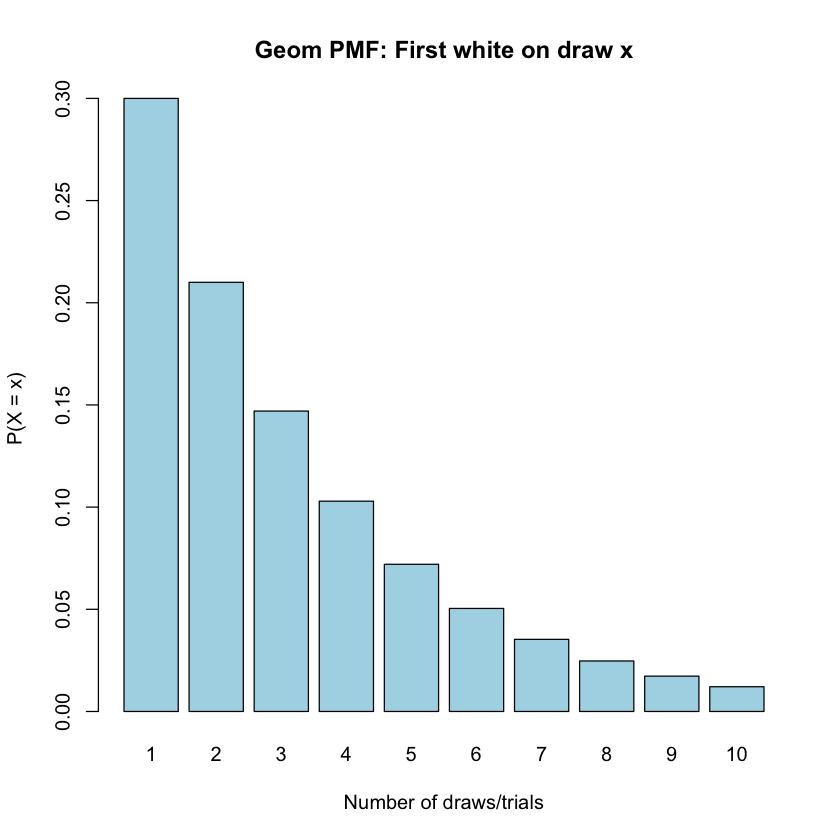

In [38]:
# P(first success on x-th draw)
x <- 1:10
pmf <- dgeom(x - 1, prob = 0.3)
barplot(
    pmf, 
    names.arg = x, 
    main = "Geom PMF: First white on draw x", 
    ylab = "P(X = x)",
    xlab = "Number of draws/trials",
    col = "lightblue",
)

### CDF

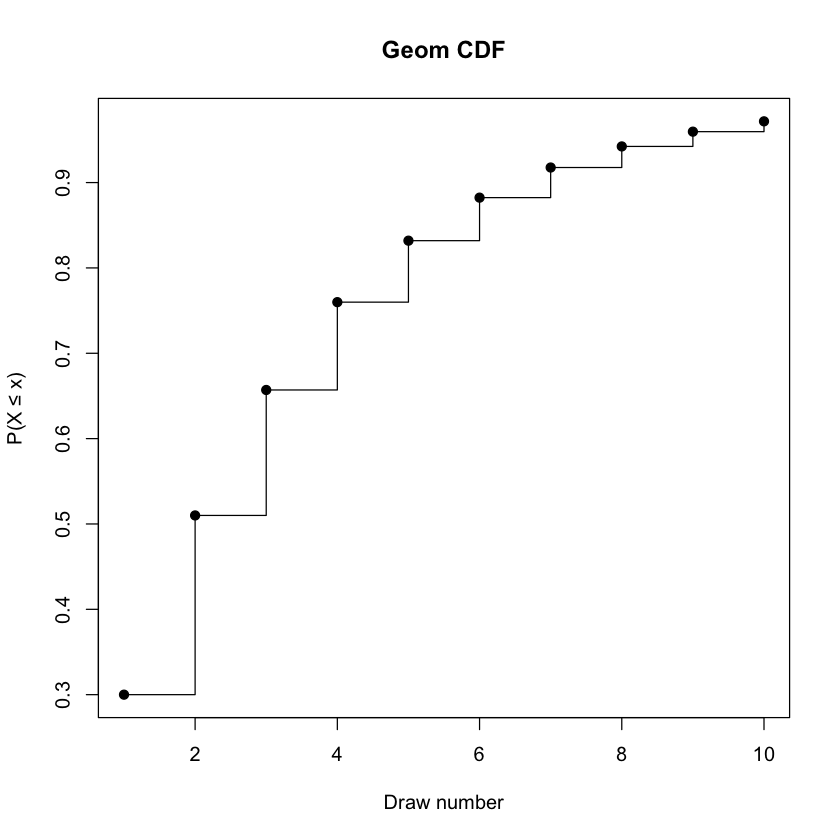

In [20]:
# P(first success ≤ x)
cdf_geom <- pgeom(x - 1, prob = 0.3)
plot(x, cdf, 
     type = "s",
     main = "Geom CDF", 
     ylab = "P(X ≤ x)", 
     xlab = "Draw number",
)
points(x, cdf_geom, pch = 19)

### Simulation

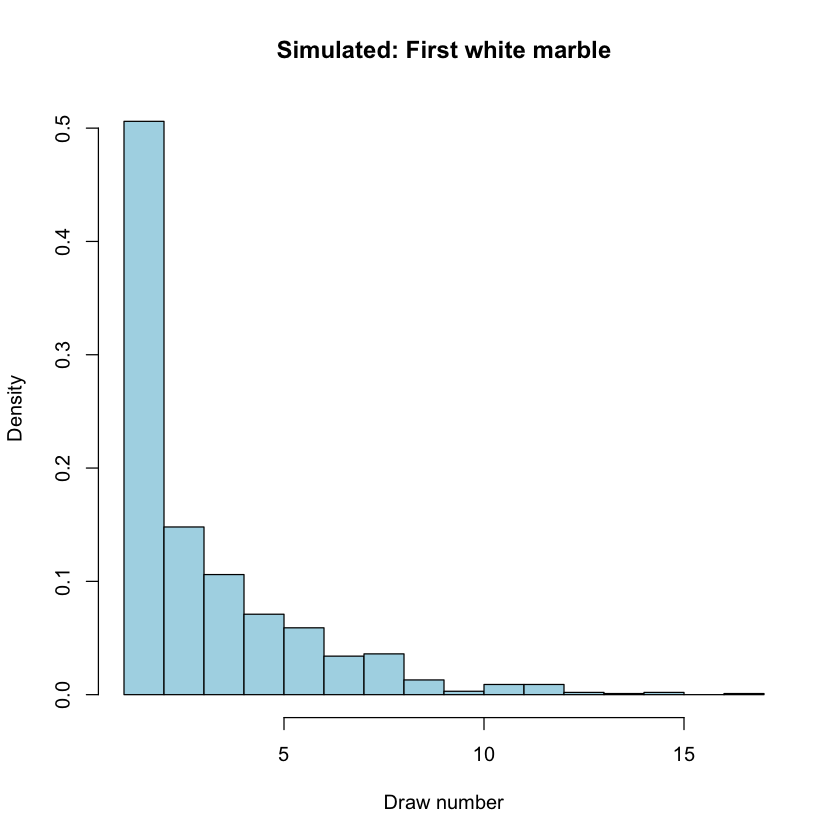

In [21]:
# Simulate 1000 repetitions
sim <- rgeom(1000, prob = 0.3) + 1
hist(
    sim, 
    breaks = 20, 
    main = "Simulated: First white marble", 
    xlab = "Draw number", 
    freq = FALSE,
    col = "lightblue",
)

## Negative binomial distribution

### PMF

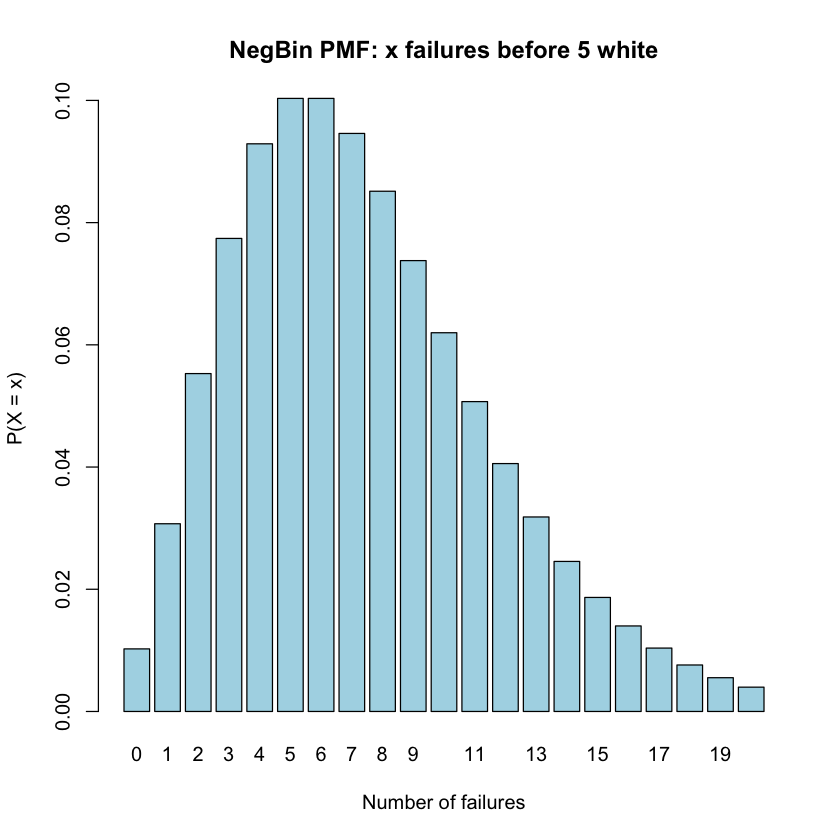

In [41]:
# PMF: P(x failures before 5 successes)
x <- 0:20
pmf <- dnbinom(x, size = 5, prob = 0.4)
barplot(pmf, 
        names.arg = x, 
        main = "NegBin PMF: x failures before 5 white", 
        ylab = "P(X = x)",
        xlab = "Number of failures",
        col = "lightblue",
)

### CDF

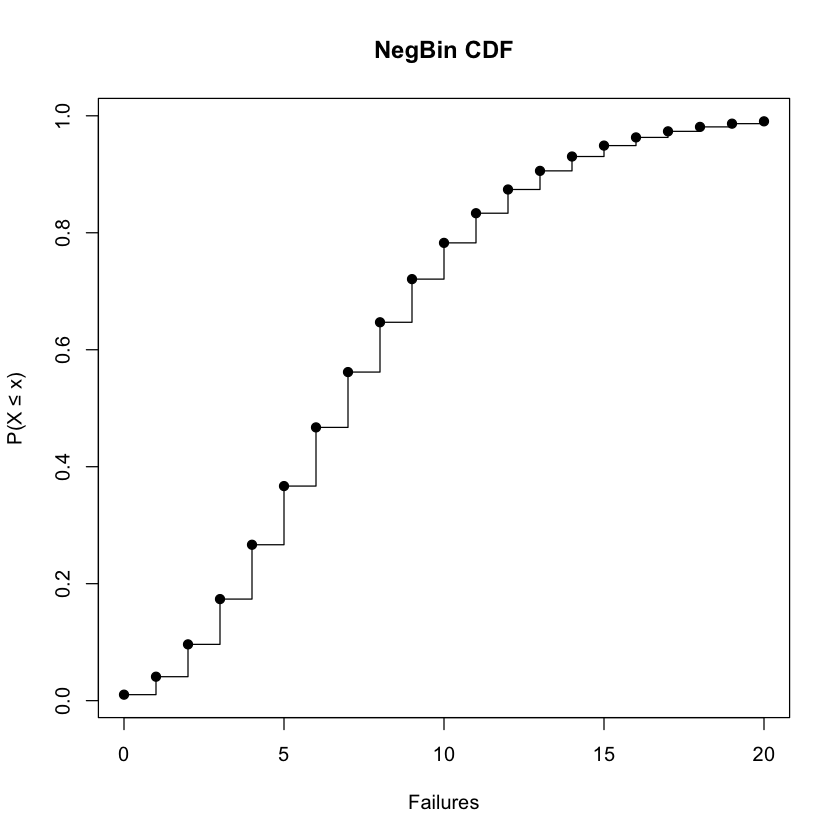

In [26]:
# CDF: P(≤ x failures before 5 successes)
cdf_negbin <- pnbinom(x, size = 5, prob = 0.4)
plot(x, cdf_negbin, type = "s", main = "NegBin CDF", ylab = "P(X ≤ x)", xlab = "Failures")
points(x, cdf_negbin, pch = 19)

### Simulation

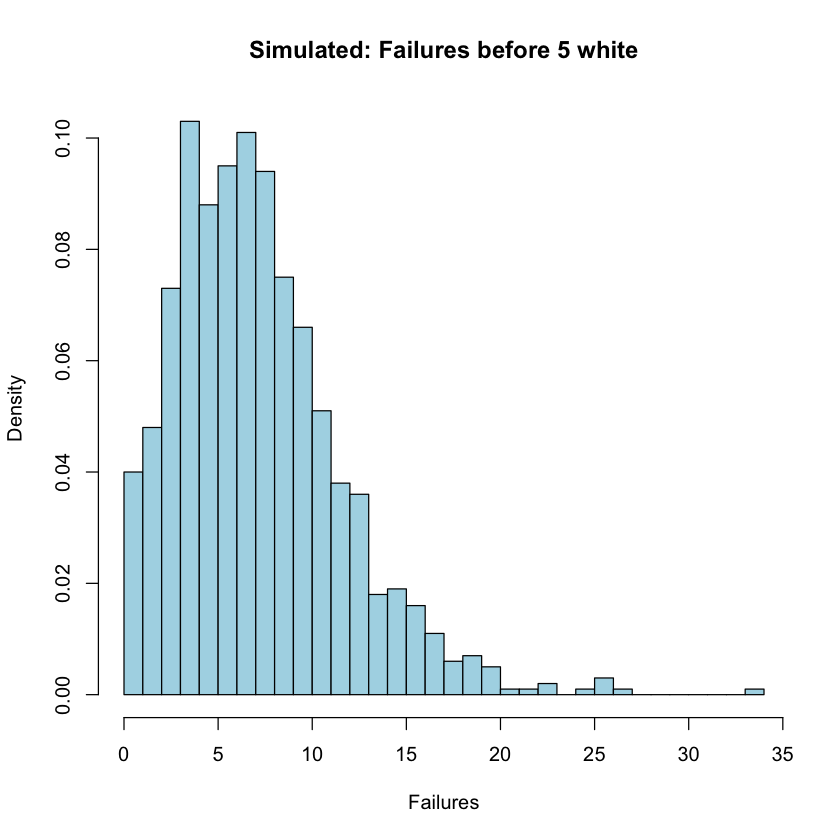

In [29]:
# Simulate 1000 trials
sim <- rnbinom(1000, size = 5, prob = 0.4)
hist(sim, 
     breaks = 30, 
     main = "Simulated: Failures before 5 white", 
     xlab = "Failures", 
     freq = FALSE,
     col = "lightblue"
)

## Poisson distribution

### PMF

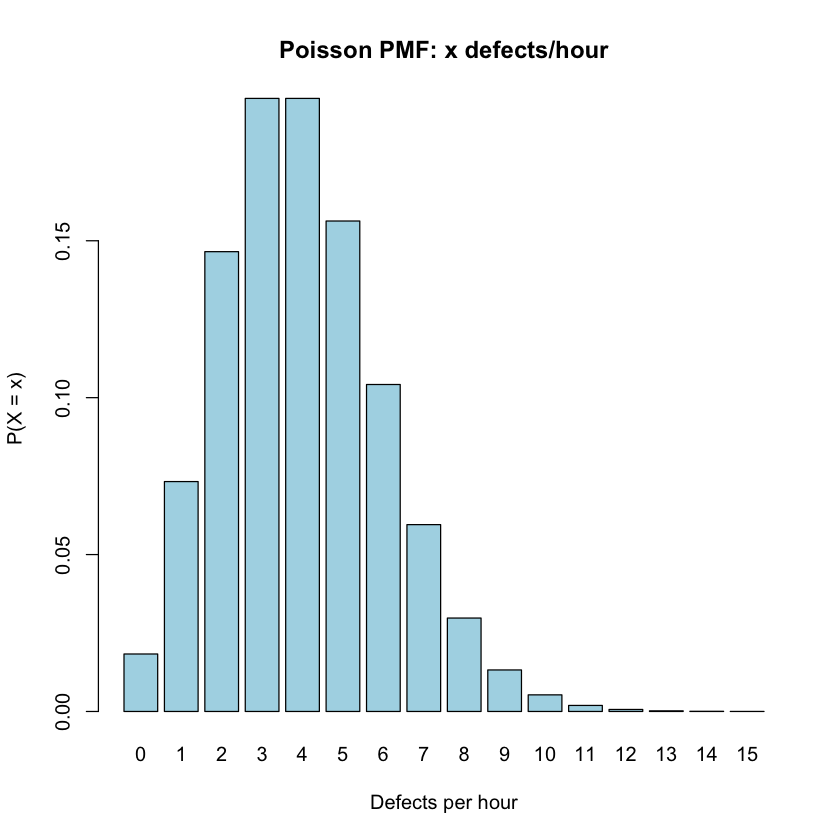

In [43]:
# PMF: P(x defects in 1 hour)
x <- 0:15
pmf <- dpois(x, lambda = 4)
barplot(
    pmf, 
    names.arg = x, 
    main = "Poisson PMF: x defects/hour", 
    ylab = "P(X = x)",
    xlab = "Defects per hour",
    col = "lightblue"
)

### CDF

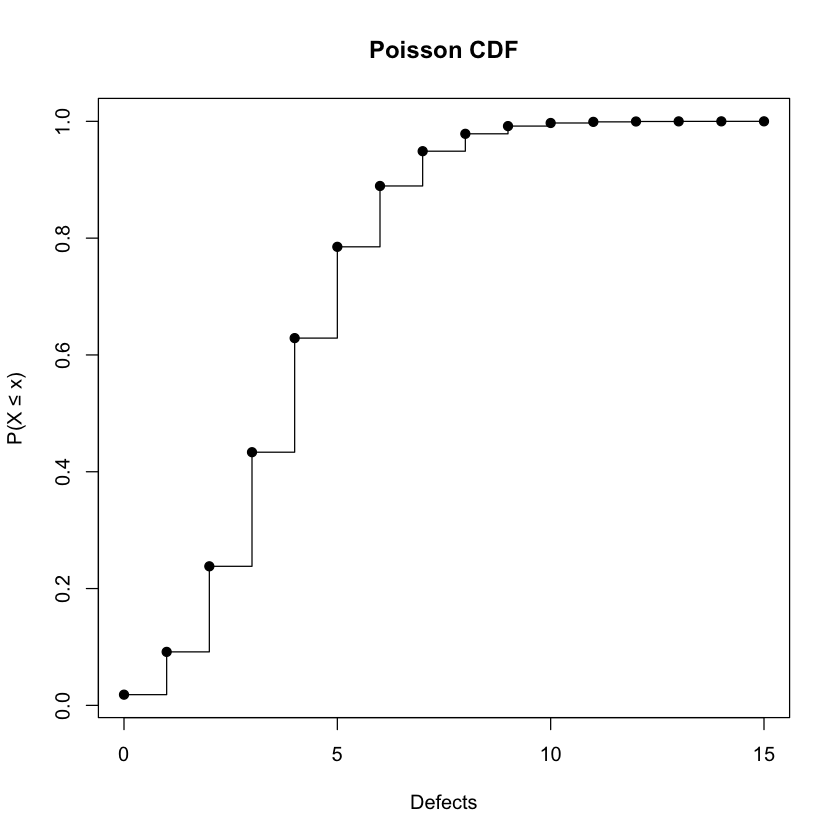

In [34]:
# CDF: P(≤ x defects)
cdf_pois <- ppois(x, lambda = 4)
plot(
    x, 
    cdf_pois, 
    type = "s", 
    main = "Poisson CDF", 
    ylab = "P(X ≤ x)", 
    xlab = "Defects",
)
points(x, cdf_pois, pch = 19)

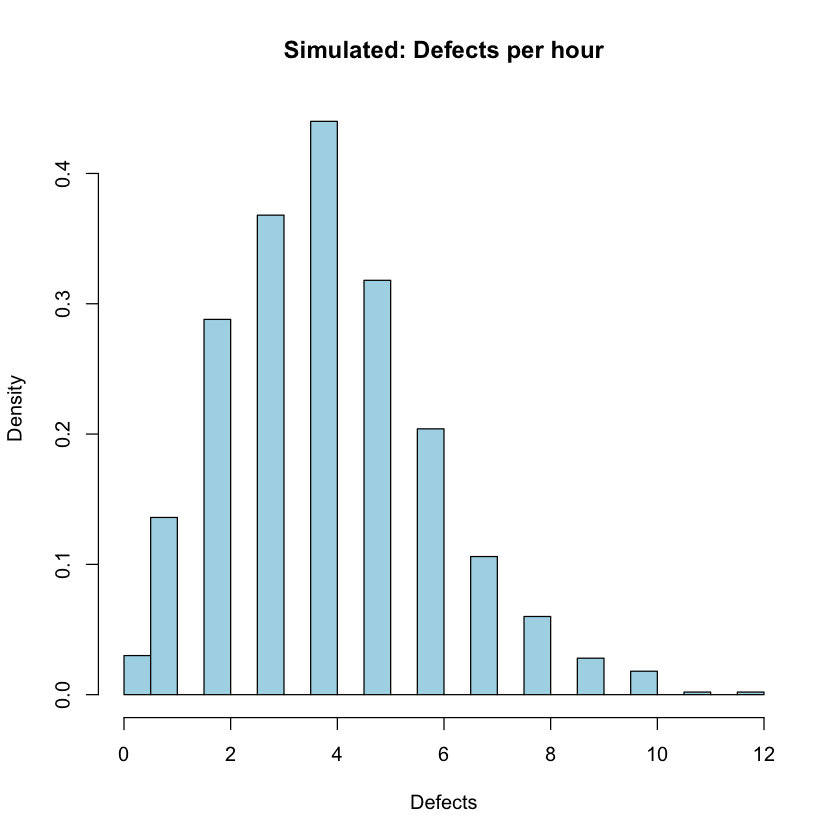

In [35]:
# Simulate 1000 hours
sim <- rpois(1000, lambda = 4)
hist(
    sim, 
    breaks = 20, 
    main = "Simulated: Defects per hour", 
    xlab = "Defects", 
    freq = FALSE,
    col = "lightblue"
)